<a href="https://colab.research.google.com/github/Iammanan07/weather-prediction-system-/blob/main/weather_prediction_(classification_model)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# DataSet:

**Based on some factor we are,  going to predict the weathers..**



> Add blockquote



* date : dates
* precipitation : All forms in which water falls on the land surface and open water bodies as rain, sleet, snow, hail, or drizzle
* temp_max : Maximum Temperature
* temp_min : Minimum Temperature
* wind : Wind speed
* weather : weathers types

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file
import pandas as pd
df = pd.read_csv("seattle-weather.csv")
print(df.head())

Saving seattle-weather.csv to seattle-weather (1).csv
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
#Check for null values
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
#convert the data type into datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.nunique()

,0
date,1461
precipitation,111
temp_max,67
temp_min,55
wind,79
weather,5


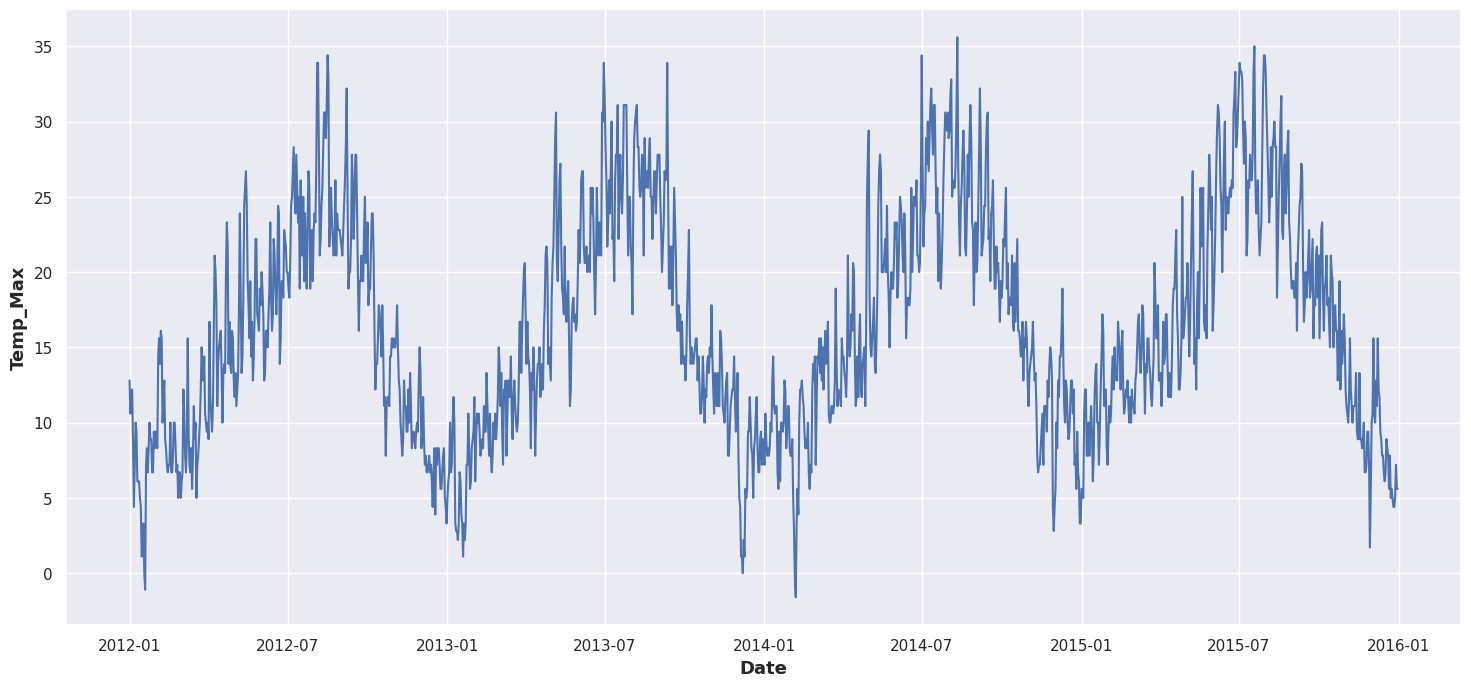

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

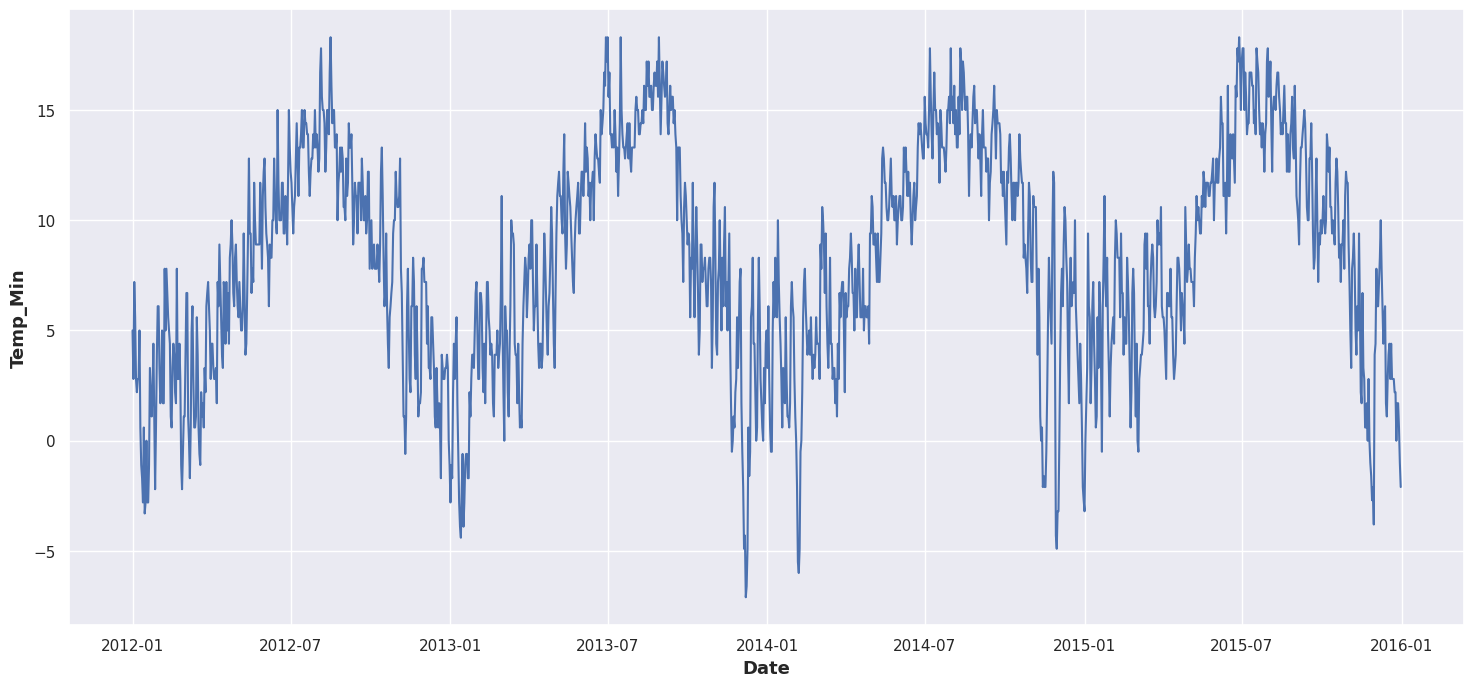

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

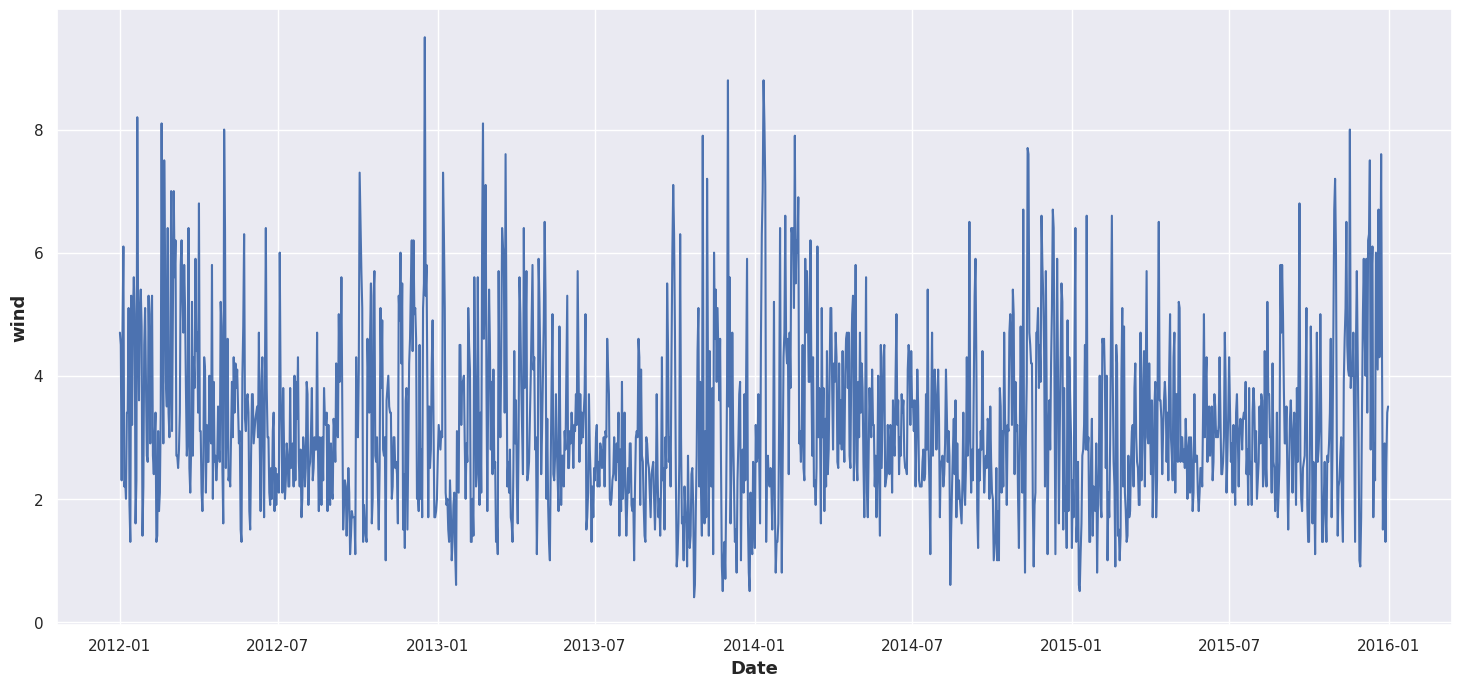

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

<Figure size 1400x800 with 0 Axes>

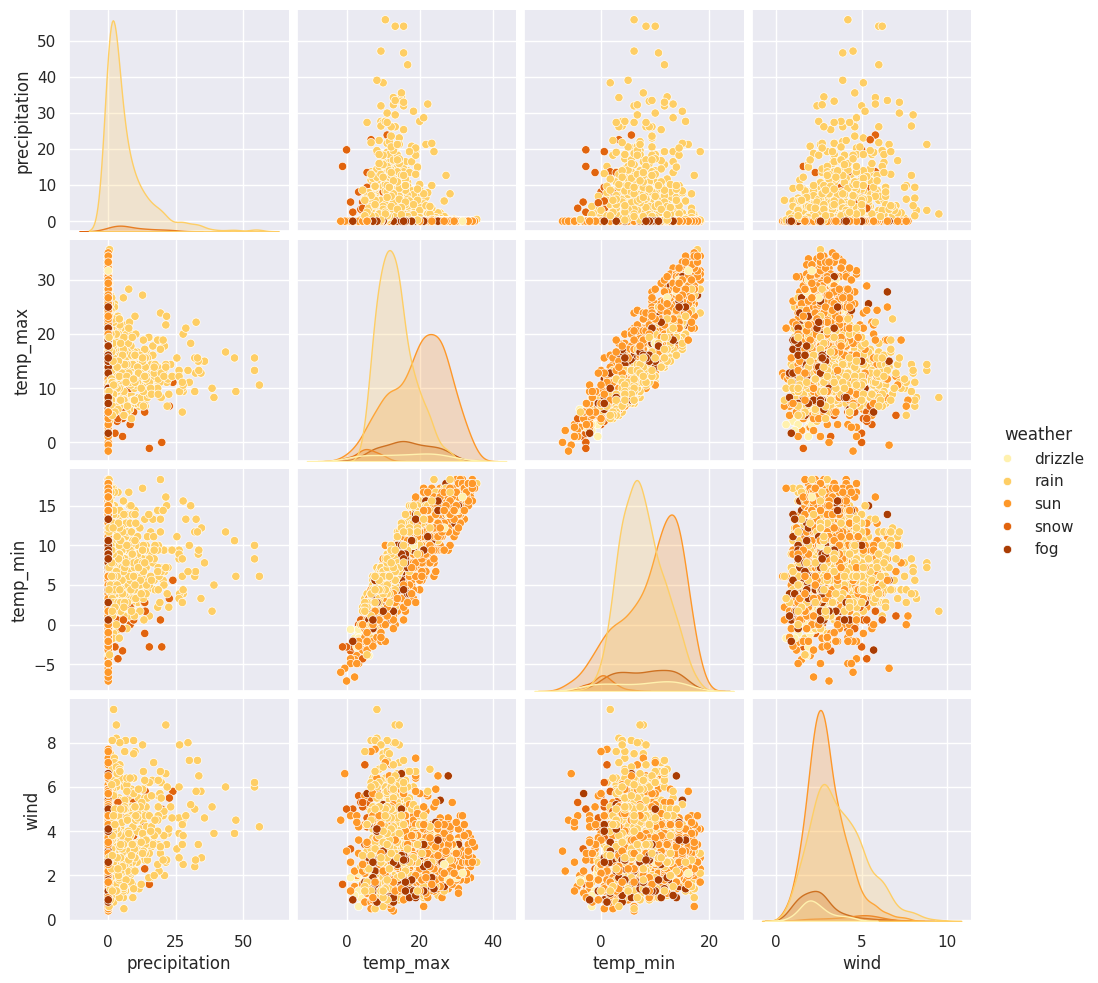

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date',axis=1),hue='weather',palette="YlOrBr")
plt.show()

<ipython-input-6-e6cac3d8f493>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_max',data=df,palette="crest")


<Figure size 1000x500 with 0 Axes>

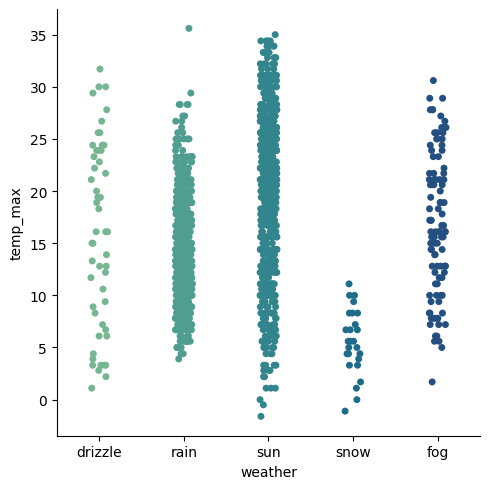

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=df,palette="crest")
plt.show()

<ipython-input-30-ed32d15c45d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='temp_min',data=df,palette = "RdBu")


<Figure size 1000x500 with 0 Axes>

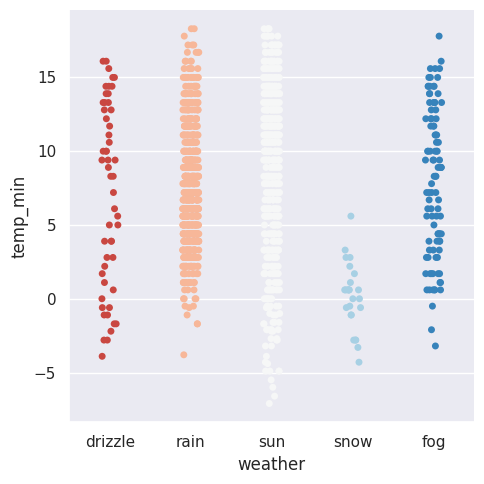

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=df,palette = "RdBu")
plt.show()

<ipython-input-31-dabc78071f1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='wind',data=df,palette = "magma")


<Figure size 1000x500 with 0 Axes>

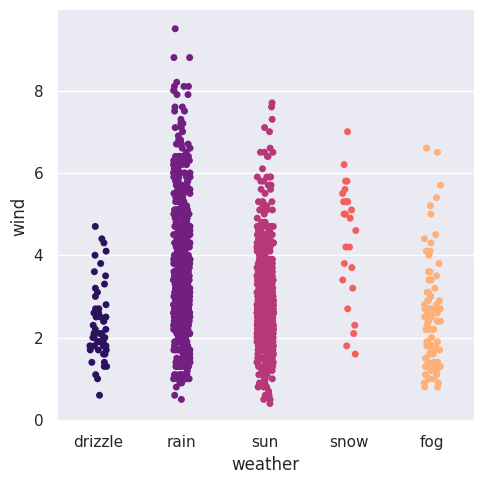

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='wind',data=df,palette = "magma")
plt.show()

<ipython-input-33-59ecdd92018e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather',y ='precipitation',data=df,palette = "viridis")


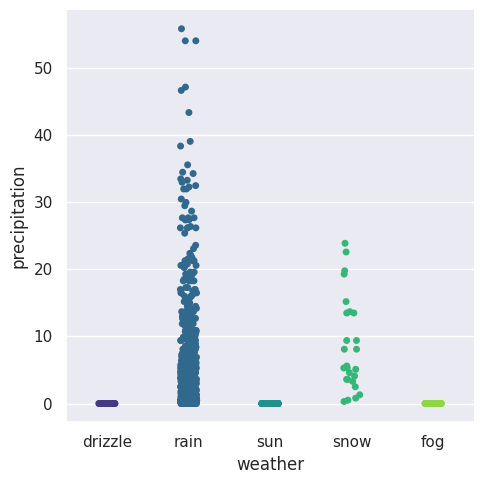

In [ ]:
sns.catplot(x='weather',y ='precipitation',data=df,palette = "viridis")
plt.show()

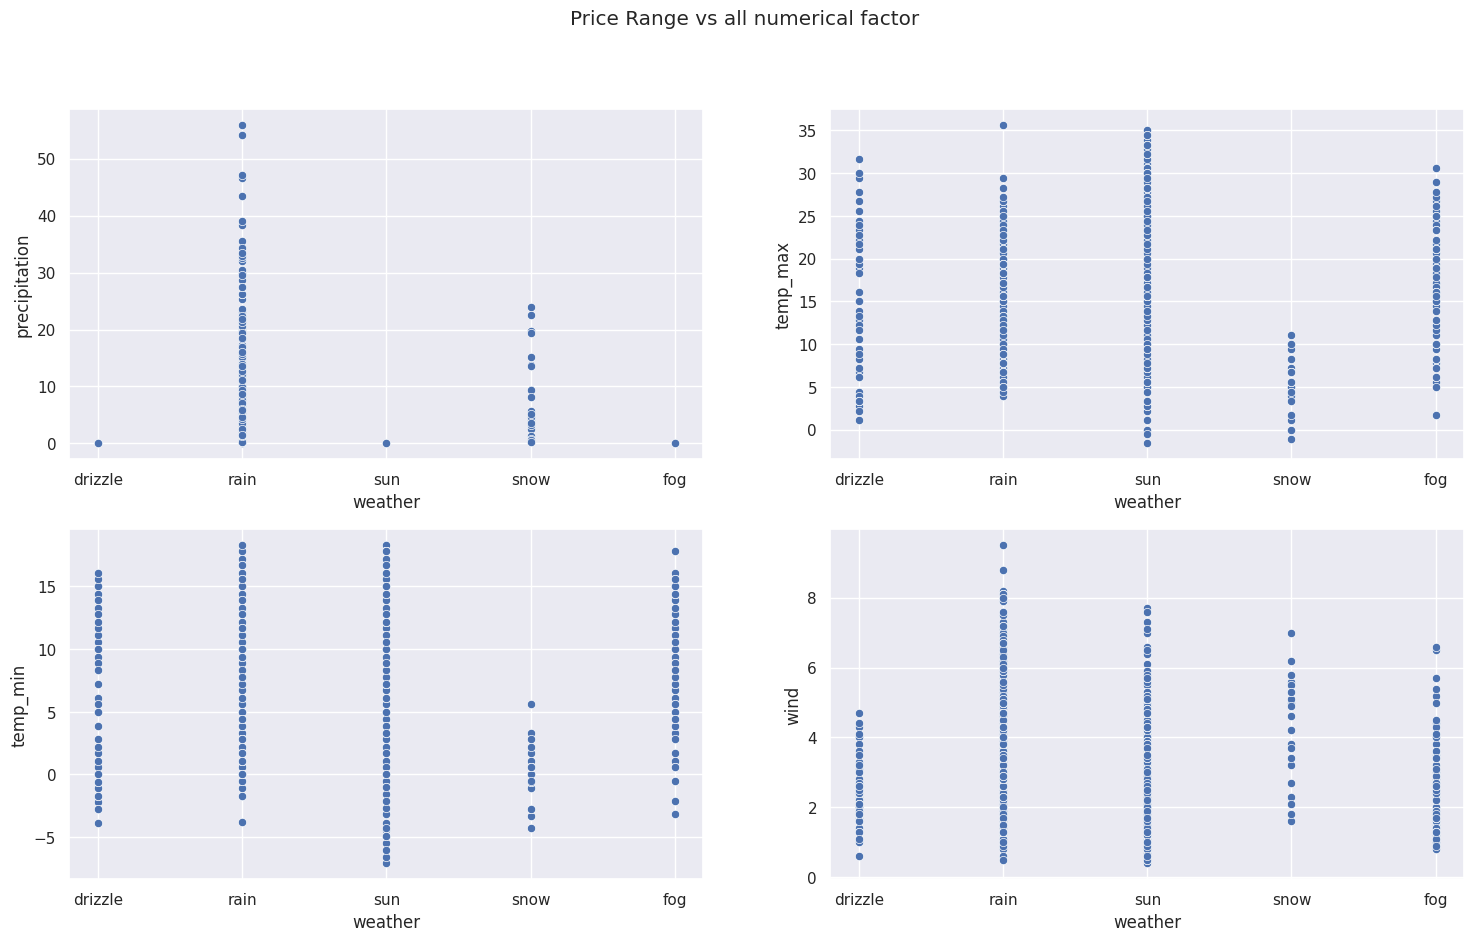

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=df, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=df, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=df, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=df, x='weather', y='wind')
plt.show()

In [ ]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()
LABEL_ENCODING("weather")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [ ]:
data = df.drop('date',axis=1)

In [ ]:
x = data.drop('weather',axis=1)
y = data['weather']

# Split the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 130   0  25]
 [  0   0   6   0   0]
 [  0   0  14   0 149]]


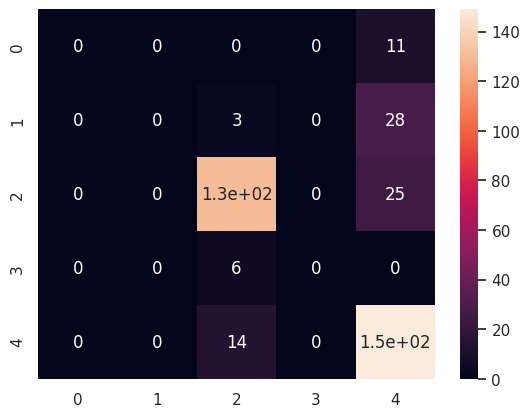

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7622950819672131


# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the tset set result

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 126   0  29]
 [  0   0   4   2   0]
 [  0   0   0   0 163]]


In [ ]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.7950819672131147


# Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   1   3   0   6]
 [  1   4   5   0  21]
 [  0   3 127   0  25]
 [  0   0   3   1   2]
 [  5  17  26   0 115]]


In [ ]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.6775956284153005


# Training the Naive Bayes on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 141   2  12]
 [  0   0   2   4   0]
 [  0   0   0   0 163]]


In [ ]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8415300546448088


# Training Decision Tree Classification on Train set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([4, 0, 2, 4, 4, 2, 2, 2, 4, 2, 0, 2, 4, 1, 0, 4, 1, 2, 2, 2, 2, 2,
       2, 4, 4, 0, 4, 2, 0, 4, 2, 4, 3, 2, 2, 2, 0, 2, 0, 2, 4, 2, 2, 2,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 3, 4, 2, 4, 4, 4, 1, 1, 2,
       4, 1, 4, 2, 2, 3, 2, 0, 1, 4, 2, 0, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 4, 1, 2, 1, 2, 3, 4, 0, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 2, 4, 4, 0, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 1, 4, 2,
       1, 2, 0, 4, 2, 4, 4, 0, 2, 1, 2, 2, 4, 2, 2, 2, 1, 1, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 1, 2, 1, 4, 2, 2, 4, 4, 4, 1, 4, 2, 2, 4, 0,
       2, 4, 2, 2, 1, 4, 2, 2, 2, 4, 1, 1, 3, 2, 2, 2, 1, 4, 1, 2, 2, 2,
       1, 4, 4, 2, 4, 4, 2, 4, 2, 0, 0, 2, 2, 2, 2, 1, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 0, 2, 4, 0, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4,
       1, 2, 4, 2, 4, 1, 4, 4, 2, 2, 0, 1, 2, 4, 2, 4, 2, 2, 2, 0, 0, 4,
       2, 4, 2, 2, 1, 2, 4, 2, 1, 2, 2, 4, 2, 4, 2,

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   2   1   0   7]
 [  6   8   1   0  16]
 [  0   1 140   4  10]
 [  0   0   3   3   0]
 [ 18  23   9   0 113]]


<Axes: >

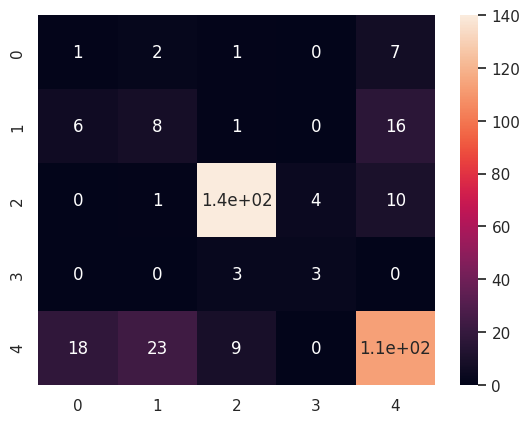

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.7240437158469946


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)
RandomForestClassifier(n_estimators=40, random_state=0)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

<Axes: >

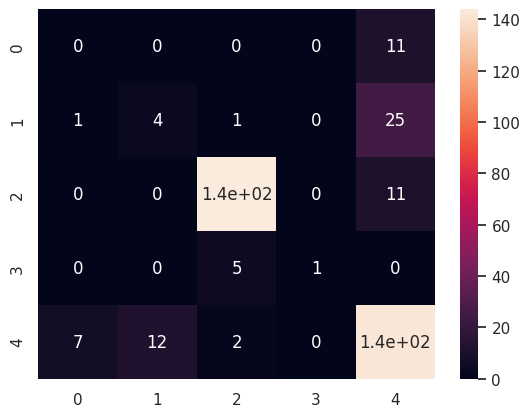

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.25      0.13      0.17        31
           2       0.95      0.93      0.94       155
           3       1.00      0.17      0.29         6
           4       0.75      0.87      0.81       163

    accuracy                           0.80       366
   macro avg       0.59      0.42      0.44       366
weighted avg       0.77      0.80      0.78       366



In [ ]:
acc6 = forest.score(X_test,y_test)
print(acc6)

0.7950819672131147


# Training XGBoost on the Training set

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Making confusion matrix

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

NameError: name 'classifier' is not defined

In [ ]:
print(acc7)

0.7841530054644809


# Create visualization for all model with their Accuracy

<ipython-input-74-d0a0d3490108>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)


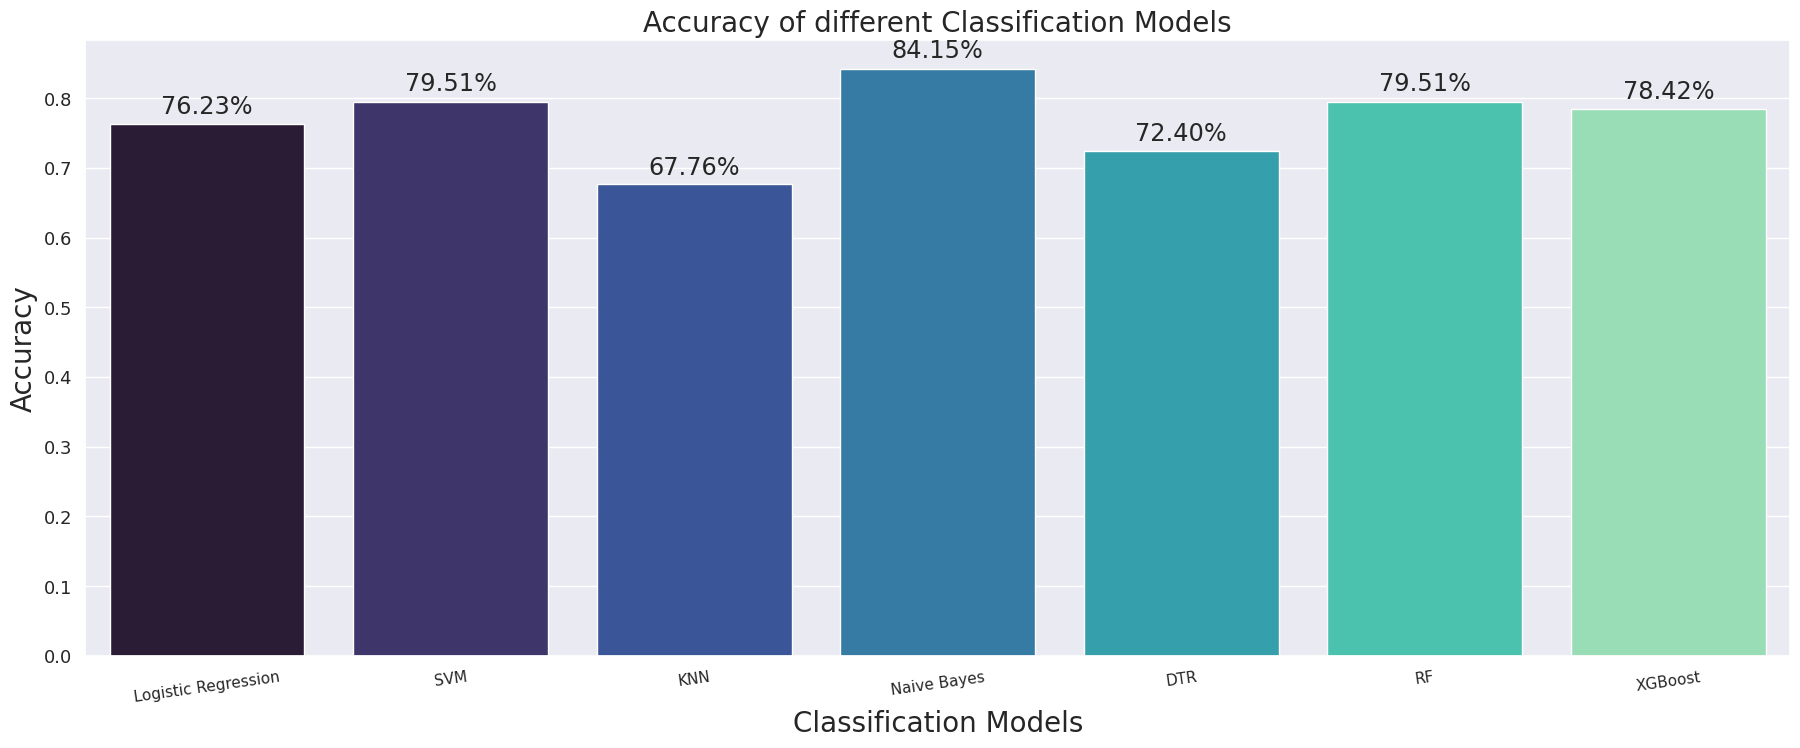

In [ ]:
mylist=[]
mylist2=[]
# Assigning the correct float value to acc1
acc1 = 0.7622950819672131
acc2 = 0.7950819672131147

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RF")
mylist.append(acc7)
mylist2.append("XGBoost")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()